# Fourier Transform of Sunspot Data

In this notebook I perform a *fast fourier transform* (fft) of the smoothed sunspot data, in order to compare it with the kernel functions. 

The idea is to find the kernel which best describes the fft and implement that in our GP.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load sunspot data into a numpy array
df = pd.read_csv('Data/Savitzky-Golay Data/SVG_poly1.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
#df.set_index("Year", inplace=True)

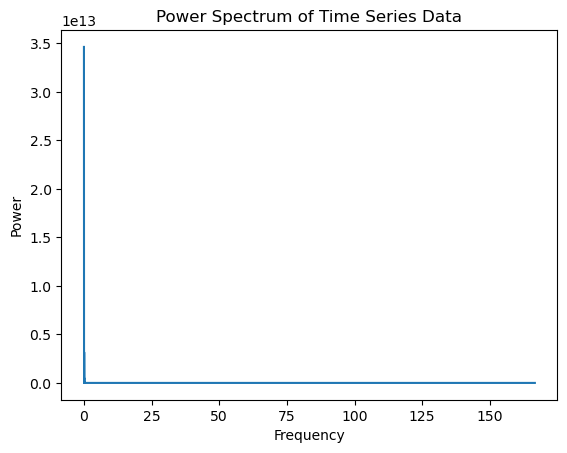

In [9]:
# Compute sampling rate
sampling_rate = 1.0 / (df["Year"].iloc[1] - df["Year"].iloc[0])

# Compute FFT of the data
fft_data = np.fft.fft(df["Sunspot_Number"])

# Compute power spectrum
power_spectrum = np.abs(fft_data)**2

# Compute corresponding frequencies
freqs = np.fft.fftfreq(len(df["Sunspot_Number"]), 1/sampling_rate)

# Plot power spectrum
plt.plot(freqs[:len(power_spectrum)//2], power_spectrum[:len(power_spectrum)//2])
plt.title("Power Spectrum of Time Series Data")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()


In [6]:
f = 1/11
f

0.09090909090909091